In [59]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

#1.**Download the dataset**
  
   Downloaded

# **2.load the dataset**

In [60]:
data = pd.read_csv(r"/content/Churn_Modelling.csv")


#**3.perform data** **visualizations**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


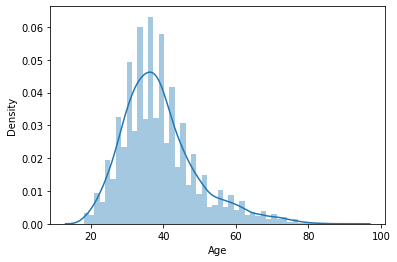

In [61]:
#univariate analysis
sns.distplot(data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


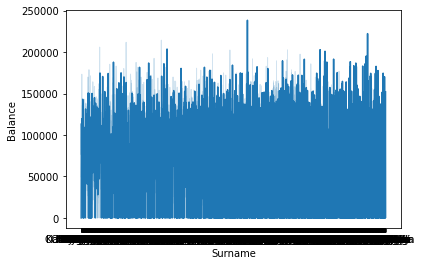

In [62]:
#bivariate analysis
sns.lineplot(data['Surname'], data['Balance'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


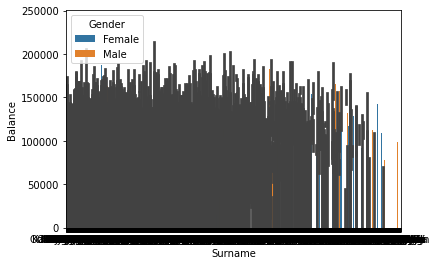

In [ ]:
#multi variate analysis
sns.barplot(data['Surname'], data['Balance'], hue = data['Gender'])

#**4.perform the descriptive statistics**


In [63]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [64]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

In [65]:
data.mode()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15565701,Smith,850.0,France,Male,37.0,2.0,0.0,1.0,1.0,1.0,24924.92,0.0
1,2,15565706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,15565714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,15565779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,15565796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15815628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,9997,15815645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,9998,15815656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,9999,15815660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#**5.handle the missing values**

In [66]:
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [67]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#**6.find the outliers and replace the outliers**

In [68]:
data.quantile([0,1])


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.0,1.0,15565701.0,350.0,18.0,0.0,0.00,1.0,0.0,0.0,11.58,0.0
1.0,10000.0,15815690.0,850.0,92.0,10.0,250898.09,4.0,1.0,1.0,199992.48,1.0


In [69]:
data.quantile([0.1,0.8])

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.1,1000.9,15591167.1,521.0,27.0,1.0,0.000,1.0,0.0,0.0,20273.580,0.0
0.8,8000.2,15765818.8,735.0,46.0,8.0,133710.358,2.0,1.0,1.0,159836.726,1.0


#**7.check for categorical columns and perform encoding**

In [70]:
from pandas.core.arrays.interval import le
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
oneh=preprocessing.OneHotEncoder()
data['Age']=le.fit_transform(data['Age'])
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,24,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,23,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,24,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,21,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,25,2,125510.82,1,1,1,79084.10,0


#**8.split the data into dependant and independant variables**

In [71]:
x=data.iloc[:,0:12]
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,1,15634602,Hargrave,619,France,Female,24,2,0.00,1,1,1
1,2,15647311,Hill,608,Spain,Female,23,1,83807.86,1,0,1
2,3,15619304,Onio,502,France,Female,24,8,159660.80,3,1,0
3,4,15701354,Boni,699,France,Female,21,1,0.00,2,0,0
4,5,15737888,Mitchell,850,Spain,Female,25,2,125510.82,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,21,5,0.00,2,1,0
9996,9997,15569892,Johnstone,516,France,Male,17,10,57369.61,1,1,1
9997,9998,15584532,Liu,709,France,Female,18,7,0.00,1,0,1
9998,9999,15682355,Sabbatini,772,Germany,Male,24,3,75075.31,2,1,0


In [72]:
y=data['CreditScore']
y

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

#**9.scale the independent variables**

In [73]:
x=data.iloc[:,0:1]
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled


array([[-1.73187761],
       [-1.7315312 ],
       [-1.73118479],
       ...,
       [ 1.73118479],
       [ 1.7315312 ],
       [ 1.73187761]])

#**10.split the data into train and test**

In [50]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.4, random_state=0 )

x_train

array([[ 0.97323935],
       [ 0.09682164],
       [-0.59599869],
       ...,
       [-0.60119484],
       [ 1.67853045],
       [-0.78548505]])

In [52]:
x_train.shape

(6000, 1)

In [53]:
y_train

7809    579
5279    652
3279    652
8984    645
8466    613
       ... 
9225    594
4859    794
3264    738
9845    590
2732    623
Name: CreditScore, Length: 6000, dtype: int64

In [54]:
y_train.shape

(6000,)

In [55]:
x_test

array([[ 1.52229946],
       [-1.42080128],
       [-0.90118604],
       ...,
       [ 0.71620301],
       [-0.14601188],
       [-0.27626211]])

In [56]:
x_test.shape

(4000, 1)

In [57]:
y_test

9394    597
898     523
2398    706
5906    788
2343    706
       ... 
4758    493
9914    496
7067    746
4578    691
4202    526
Name: CreditScore, Length: 4000, dtype: int64

In [58]:
y_test.shape

(4000,)